# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 로지스틱 회귀분석은 cutoff 설정 값에 따라 classification의 성능이 달라집니다.      
   해당 데이터셋에 걸맞는 cutoff value를 찾아보고, 이를 기반으로 예측을 진행해 성능을 평가해 주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

    본격적인 분석에 앞서 기본적인 데이터에 대한 정보와 분석 툴들을 설정한다. 주어진 데이터셋은 비식별화 된 개인정보를 독립변수로, class를 반응변수로 둔 데이터로 반응변수의 값이 0과 1로만 이루어져 있으므로 logistic regression을 진행해야한다.

In [3]:
import pandas as pd
import numpy as np

In [4]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [5]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


## 1. Logistic Regression 

In [6]:
credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


    우선 describe 함수를 사용하여 변수에 대한 요약적인 정보를 파악한다. 변수들의 min, max값을 봤을 때 들쭉날쭉 하므로 scaling이 이루어져야 한다. 하지만 지금 상태로 scaling을 하게 되면 Class 역시 값이 바뀌게 되므로 Class는 따로 빼둔 뒤, 나중에 다시 데이터 프레임에 합치기로 한다.

In [7]:
credit_class = credit['Class']
credit_class

0        0
1        0
2        0
3        0
4        0
        ..
28673    0
28674    0
28675    0
28676    0
28677    0
Name: Class, Length: 28678, dtype: int64

In [8]:
# min max 값의 차이가 서로 크므로 scaling을 진행한다.
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit_transform(credit)

array([[-0.90218019,  1.44246214,  0.24207645, ..., -0.04709654,
         0.9417547 , -0.09301733],
       [ 1.02744235, -0.32892601, -0.7953942 , ..., -0.23721911,
        -0.22629752, -0.09301733],
       [-1.46190736, -1.73320058,  0.7053479 , ..., -0.7554671 ,
        -1.02943014, -0.09301733],
       ...,
       [ 1.02786291,  0.0843943 , -0.9747001 , ..., -0.15087861,
        -0.1030219 , -0.09301733],
       [-0.33236542,  0.79733419,  0.8782926 , ..., -2.140772  ,
        -1.05999649, -0.09301733],
       [ 1.09831537, -0.52987507, -0.90637085, ..., -0.13776702,
        -0.2565925 , -0.09301733]])

In [10]:
credit = pd.DataFrame(scaler.fit_transform(credit), columns = credit.columns)
credit

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.902180,1.442462,0.242076,0.682170,-0.545636,1.897453,-3.087657,-7.481774,-1.310739,-1.750813,...,3.586292,-6.258702,1.163043,0.721013,-0.838813,1.973207,-1.295843,-0.047097,0.941755,-0.093017
1,1.027442,-0.328926,-0.795394,-0.395393,0.029429,-0.432294,0.005620,-0.185605,1.049741,-0.240491,...,-0.110982,0.038445,0.528470,0.078108,0.993348,0.194594,2.026379,-0.237219,-0.226298,-0.093017
2,-1.461907,-1.733201,0.705348,-0.027248,-0.751404,-0.194335,0.415558,0.461429,0.403048,-1.409372,...,1.864714,0.429058,-0.520817,2.025422,0.676446,0.019311,1.577217,-0.755467,-1.029430,-0.093017
3,-0.720659,0.921458,0.191638,0.540317,-0.333272,-0.533410,0.368140,0.395090,-0.672139,0.292162,...,0.049651,0.125696,0.549344,-0.188079,0.898622,-0.414465,-0.857327,0.065929,-0.511850,-0.093017
4,-0.131203,-0.224824,-1.203698,-0.599739,0.094078,-1.105548,1.362418,-0.622372,-1.085267,0.894765,...,-1.219154,-0.017103,1.373663,-0.036971,0.129301,-2.831946,1.555181,1.248615,1.110322,-0.093017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,1.023255,-0.023908,-0.566583,0.251205,-0.024285,-0.892442,0.202475,-0.286709,0.376723,0.071062,...,-0.239323,-0.341422,-0.845179,0.566116,0.117848,-0.517101,0.399455,-0.165871,-0.200830,-0.093017
28674,0.630217,-0.793406,0.924346,-0.163191,-1.294682,0.410528,-1.177492,0.340326,0.900087,0.251606,...,-0.177753,0.158912,0.972702,-0.056755,0.173374,0.662386,-0.018687,0.223756,0.061716,-0.093017
28675,1.027863,0.084394,-0.974700,0.230460,0.397149,-0.572397,0.204807,-0.205689,0.352270,-0.290601,...,-0.120511,-0.438509,-1.230805,0.520796,0.666969,-0.406308,0.369172,-0.150879,-0.103022,-0.093017
28676,-0.332365,0.797334,0.878293,1.357837,0.732640,0.508122,0.623108,-0.346918,-0.584673,1.218846,...,0.039199,0.118811,0.613586,-0.590491,-1.276522,-0.688309,0.210966,-2.140772,-1.059996,-0.093017


    여기서 보면 알 수 있듯이, scaling을 함으로써 Class값이 바뀐 것을 알 수 있다. logistic regression 모델에 y값을 적합 시킬 때, y = 0 or 1의 값을 가져야 한다. 지금 이 상태라면 후에 모델 적합 시, 오류가 날 것이므로 아래의 과정을 통해 Class 값을 다시 0과 1로 바꿔준다.

In [11]:
credit = credit.drop(['Class'], axis =1)
credit

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.902180,1.442462,0.242076,0.682170,-0.545636,1.897453,-3.087657,-7.481774,-1.310739,-1.750813,...,0.184394,3.586292,-6.258702,1.163043,0.721013,-0.838813,1.973207,-1.295843,-0.047097,0.941755
1,1.027442,-0.328926,-0.795394,-0.395393,0.029429,-0.432294,0.005620,-0.185605,1.049741,-0.240491,...,0.770828,-0.110982,0.038445,0.528470,0.078108,0.993348,0.194594,2.026379,-0.237219,-0.226298
2,-1.461907,-1.733201,0.705348,-0.027248,-0.751404,-0.194335,0.415558,0.461429,0.403048,-1.409372,...,-1.078858,1.864714,0.429058,-0.520817,2.025422,0.676446,0.019311,1.577217,-0.755467,-1.029430
3,-0.720659,0.921458,0.191638,0.540317,-0.333272,-0.533410,0.368140,0.395090,-0.672139,0.292162,...,0.793099,0.049651,0.125696,0.549344,-0.188079,0.898622,-0.414465,-0.857327,0.065929,-0.511850
4,-0.131203,-0.224824,-1.203698,-0.599739,0.094078,-1.105548,1.362418,-0.622372,-1.085267,0.894765,...,-0.651400,-1.219154,-0.017103,1.373663,-0.036971,0.129301,-2.831946,1.555181,1.248615,1.110322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,1.023255,-0.023908,-0.566583,0.251205,-0.024285,-0.892442,0.202475,-0.286709,0.376723,0.071062,...,0.156931,-0.239323,-0.341422,-0.845179,0.566116,0.117848,-0.517101,0.399455,-0.165871,-0.200830
28674,0.630217,-0.793406,0.924346,-0.163191,-1.294682,0.410528,-1.177492,0.340326,0.900087,0.251606,...,0.769189,-0.177753,0.158912,0.972702,-0.056755,0.173374,0.662386,-0.018687,0.223756,0.061716
28675,1.027863,0.084394,-0.974700,0.230460,0.397149,-0.572397,0.204807,-0.205689,0.352270,-0.290601,...,0.117016,-0.120511,-0.438509,-1.230805,0.520796,0.666969,-0.406308,0.369172,-0.150879,-0.103022
28676,-0.332365,0.797334,0.878293,1.357837,0.732640,0.508122,0.623108,-0.346918,-0.584673,1.218846,...,0.060428,0.039199,0.118811,0.613586,-0.590491,-1.276522,-0.688309,0.210966,-2.140772,-1.059996


In [12]:
credit = pd.concat([credit, credit_class],axis = 1)
credit

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.902180,1.442462,0.242076,0.682170,-0.545636,1.897453,-3.087657,-7.481774,-1.310739,-1.750813,...,3.586292,-6.258702,1.163043,0.721013,-0.838813,1.973207,-1.295843,-0.047097,0.941755,0
1,1.027442,-0.328926,-0.795394,-0.395393,0.029429,-0.432294,0.005620,-0.185605,1.049741,-0.240491,...,-0.110982,0.038445,0.528470,0.078108,0.993348,0.194594,2.026379,-0.237219,-0.226298,0
2,-1.461907,-1.733201,0.705348,-0.027248,-0.751404,-0.194335,0.415558,0.461429,0.403048,-1.409372,...,1.864714,0.429058,-0.520817,2.025422,0.676446,0.019311,1.577217,-0.755467,-1.029430,0
3,-0.720659,0.921458,0.191638,0.540317,-0.333272,-0.533410,0.368140,0.395090,-0.672139,0.292162,...,0.049651,0.125696,0.549344,-0.188079,0.898622,-0.414465,-0.857327,0.065929,-0.511850,0
4,-0.131203,-0.224824,-1.203698,-0.599739,0.094078,-1.105548,1.362418,-0.622372,-1.085267,0.894765,...,-1.219154,-0.017103,1.373663,-0.036971,0.129301,-2.831946,1.555181,1.248615,1.110322,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,1.023255,-0.023908,-0.566583,0.251205,-0.024285,-0.892442,0.202475,-0.286709,0.376723,0.071062,...,-0.239323,-0.341422,-0.845179,0.566116,0.117848,-0.517101,0.399455,-0.165871,-0.200830,0
28674,0.630217,-0.793406,0.924346,-0.163191,-1.294682,0.410528,-1.177492,0.340326,0.900087,0.251606,...,-0.177753,0.158912,0.972702,-0.056755,0.173374,0.662386,-0.018687,0.223756,0.061716,0
28675,1.027863,0.084394,-0.974700,0.230460,0.397149,-0.572397,0.204807,-0.205689,0.352270,-0.290601,...,-0.120511,-0.438509,-1.230805,0.520796,0.666969,-0.406308,0.369172,-0.150879,-0.103022,0
28676,-0.332365,0.797334,0.878293,1.357837,0.732640,0.508122,0.623108,-0.346918,-0.584673,1.218846,...,0.039199,0.118811,0.613586,-0.590491,-1.276522,-0.688309,0.210966,-2.140772,-1.059996,0


In [13]:
# target 변수 설정 : 아래의 과정을 통해 데이터를 카테고리화 시킨다.
target = pd.Series(credit.Class, dtype = "category")
credit['Class'] = target 
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.902180,1.442462,0.242076,0.682170,-0.545636,1.897453,-3.087657,-7.481774,-1.310739,-1.750813,...,3.586292,-6.258702,1.163043,0.721013,-0.838813,1.973207,-1.295843,-0.047097,0.941755,0
1,1.027442,-0.328926,-0.795394,-0.395393,0.029429,-0.432294,0.005620,-0.185605,1.049741,-0.240491,...,-0.110982,0.038445,0.528470,0.078108,0.993348,0.194594,2.026379,-0.237219,-0.226298,0
2,-1.461907,-1.733201,0.705348,-0.027248,-0.751404,-0.194335,0.415558,0.461429,0.403048,-1.409372,...,1.864714,0.429058,-0.520817,2.025422,0.676446,0.019311,1.577217,-0.755467,-1.029430,0
3,-0.720659,0.921458,0.191638,0.540317,-0.333272,-0.533410,0.368140,0.395090,-0.672139,0.292162,...,0.049651,0.125696,0.549344,-0.188079,0.898622,-0.414465,-0.857327,0.065929,-0.511850,0
4,-0.131203,-0.224824,-1.203698,-0.599739,0.094078,-1.105548,1.362418,-0.622372,-1.085267,0.894765,...,-1.219154,-0.017103,1.373663,-0.036971,0.129301,-2.831946,1.555181,1.248615,1.110322,0


In [14]:
target.value_counts()

0    28432
1      246
Name: Class, dtype: int64

    본격적으로 logistic 모델에 적합시킨다.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X = credit.drop(["Class"],axis=1)
y = credit["Class"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21508, 28) (7170, 28) (21508,) (7170,)


In [19]:
# Logistic Regression 
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

    만든 모델을 바탕으로 아래의 과정을 통해 y값을 예측하고 분류될 확률을 확인할 수 있다.

In [20]:
# class 예측
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
# [0으로 분류될 확률, 1로 분류될 확률]
classifier.predict_proba(X_test)

array([[9.99162657e-01, 8.37342733e-04],
       [9.99687212e-01, 3.12787618e-04],
       [9.79470309e-01, 2.05296911e-02],
       ...,
       [9.99915594e-01, 8.44058313e-05],
       [9.96014554e-01, 3.98544568e-03],
       [9.99193219e-01, 8.06781183e-04]])

## 2. Metrics Evaluation 

### 1) sklearn 패키지를 이용한 성능 평가지표 계산 

In [22]:
#(https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/) 해당 사이트 참조

In [23]:
from sklearn import metrics

In [24]:
from sklearn.metrics import*

In [25]:
# mean accuracy 
classifier.score(X_test, y_test)

0.997907949790795

In [26]:
# f1 score
f1_score(y_pred, y_test) 

0.845360824742268

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       0.79      0.91      0.85        45

    accuracy                           1.00      7170
   macro avg       0.89      0.95      0.92      7170
weighted avg       1.00      1.00      1.00      7170



    sklearn을 통해 성능 평가지표를 확인할 수 있다. 평균 정확도는 거의 1에 가까운 값이 나올 정도로 매우 높게 파악된다. f1 score 역시 굉장히 높게 나왔다. 또한 함수를 사용해 precision과 recall 역시 높게 나와서 모델 성능은 굉장히 높은 것으로 판단할 수 있다.

### 2) confusion matrix를 이용한 성능 평가지표 계산 

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(7114, 4, 11, 41)

In [29]:
confusion_matrix(y_test, y_pred)

array([[7114,    4],
       [  11,   41]], dtype=int64)

In [30]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
print("accuracy: ", accuracy)

accuracy:  0.997907949790795


In [31]:
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
specificity = (tn)/(fp+tn)
f1_score = 2*(precision*recall)/(precision+recall)

In [32]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.9111111111111111
recall:  0.7884615384615384
specificity:  0.9994380443944928
f1_score:  0.845360824742268


    sklearn과는 약간의 차이가 존재하지만 그럼에도 불구하고 전반적인 지표들은 굉장히 높다. 이를 바탕으로 성능을 파악해봤을 때, 모델의 성능을 높은 것으로 판단할 수 있다.

### 3) cut-off value 찾아보기 
* fpr = fall-out = 1-specificity
* tpr = sensitivity

    아래의 코드를 돌리면 cutoff value와 roc curve를 그릴 수 있다.

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,classifier.decision_function(X_test))

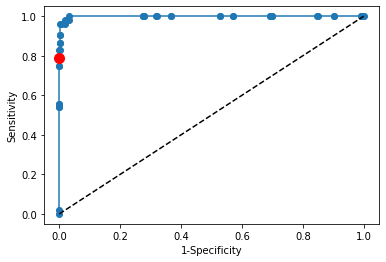

In [34]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [35]:
# roc curve 아래의 면적 
auc = metrics.auc(fpr, tpr)

    실제로 위의 코드를 돌리면 위와 같은 그래프를 얻을 수 있다. 동시에 auc 면적도 확인할 수 있다. auc의 값은 1에 가까우며 모델의 성능이 좋다고 판단할 수 있다. 하지만 현재의 cutoff value는 optimal하지 않은 것을 파악할 수 있다.
    
    그 이유는 y의 값이 균형잡혀 있지 않기 때문이다. 위의 데이터는 사기가 일어난 경우를 1, 그렇지 않은 경우를 0으로 잡고 있다. 사기라고 하는 것이 흔히 우리의 일상생활에서 빈번하게 일어나는 일이 아니기 때문에 y에서 1의 비중은 0에 비해서 지극히 낮을 수 밖에 없다. 따라서 로지스틱 함수로 부터 구한 성공확률은 기존에 설정한 cutoff보다 대부분 낮을 수 밖에서 없다. 따라서 위와 같이 성능이 매우 뛰어남에도 불구하고 cutoff value는 optimal하지 않는 상황이 발생하게 된 것이다.
    
    이를 해결하기 위해선 cutoff 값을 낮춰 새로운 cutoff value로 모델을 새로 예측해야한다. 아래에 그 과정이 나열돼 있다.

## 3. 새로운 cutoff value로 모델 예측하기 

    보통 최적의 cutoff value는 접선의 기울기가 1인 지점에 설정하곤 한다. 따라서 기울기가 1인 y = x + k 인 접선을 바탕으로 곡선과 접하는 지점을 찾으면 된다.  
    
    즉, (sensitivity)-(1-specificity) = k 일 때, 가장 큰 k 값을 찾으면 된다. 그 k값을 바탕으로 새로운 cutoff value를 찾고 이를 기준으로 다시 y값들을 분류한다. 과정은 아래와 같다.

In [36]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [37]:
predict_new = classifier.decision_function(X_test) > optimal_threshold

In [38]:
# 새로운 cutoff value로 분류한 confusion matrix 
confusion_matrix(y_test, predict_new)

array([[6899,  219],
       [   1,   51]], dtype=int64)

In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_new).ravel()
(tn, fp, fn, tp)

(6899, 219, 1, 51)

In [40]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
print("accuracy: ", accuracy)

accuracy:  0.9693165969316597


In [41]:
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
specificity = (tn)/(fp+tn)
f1_score = 2*(precision*recall)/(precision+recall)

In [42]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.18888888888888888
recall:  0.9807692307692307
specificity:  0.9692329305984827
f1_score:  0.3167701863354037


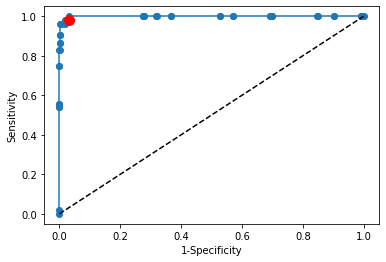

In [43]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

    그래프를 보면 threshold 점이 달라진 것을 확인할 수 있다. 즉, optimal threshold에 점을 찍은 것이다. 뿐만 아니라 새로운 예측값을 바탕으로 구한 confusion_matrix도 달라진 것을 확인할 수 있다. 이를 바탕으로 모델 성능 지표 역시 달라진 것을 확인할 수 있다.

#### Q. cutoff value를 바꿔서 나온 결과의 의의는 무엇일까요 ? 

    cutoff value를 바꿨을 때, 눈에 띄게 결과들이 바뀌었다. 우선 그래프에서 보면 기존의 cutoff는 optimal이 아니었으나 바뀐 그래프에서는 optimal로 위치가 변경됐음을 알 수 있다. 또한 confusion_matrix의 수가 많이 바뀌었음을 알 수 있다. tn같은 경우 그 값이 많이 떨어졌고, fp 같은 경우 그 값이 많이 올랐다. 또한 tp의 값이 소폭 상승하고 fp는 소폭 하향된 것을 확인할 수 있다. 
    
    즉, 기존의 cutoff가 자료에 비해 너무 높게 상정되어 있어서 실제 데이터와는 무관하게 y = 0이라고 예측할 확률이 컸던 것이다. 또한 정확성은 좋았지만, 이는 tp가 낮은 경우를 충분히 반영하지 못한 결과였던 것이다.
    
    그러나 optimal threshold를 찾아 cutoff 값을 내림으로써 confusion_matrix를 재배치 할 수 있었다. 이로써 accuracy에서 tp가 낮은 경우도 고려할 수 있게 됐다.
    
    또한 cutoff값을 내림으로써, Recall 값은 이전보다 올랐으나, precision 값은 이전보다 떨어진 것을 확인할 수 있었다. 이는 recall과 precision이 서로 상충되는 관계로 둘 다 동시에 올릴 수는 없다는 점을 알 수 있다.
    
    마지막으로 정밀도가 굉장히 하락했다는 점이 눈에 띄인다. 이 사례에서 정밀도는 사기가 발생했다고 예측한 것 중에서 실제 사기를 당한 비율을 의미한다. 이는 실제 사기를 당한 사람의 데이터의 양이 매우 적다는 점을 파악할 수 있다. 반응변수의 데이터가 매우 불균형하다는 것을 파악할 수 있다.